In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 6s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64
  253 255  63   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 205
  251 253 205 111   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 189 251
  251 253 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16  64 223 244 251 251
  211 213 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  80 181 251 253 25

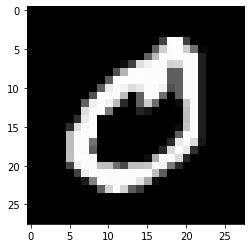

In [7]:
print(x_train[21])
plt.imshow(x_train[21], cmap='gray')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

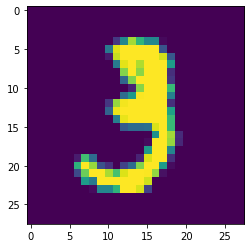

In [8]:
print(x_train[10])
plt.imshow(x_train[10])

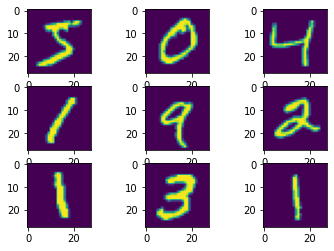

In [9]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])#, cmap='gray')

In [10]:
print(y_train[3])

1


In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0082 - accuracy: 0.9975
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0061 - accuracy: 0.9982
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.9989
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0042 - accuracy: 0.9988


In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1290 - accuracy: 0.9772


[0.12898316979408264, 0.9771999716758728]

Text(0.5, 1.0, 't loss')

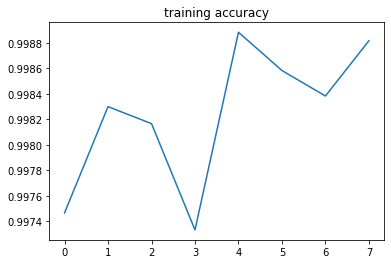

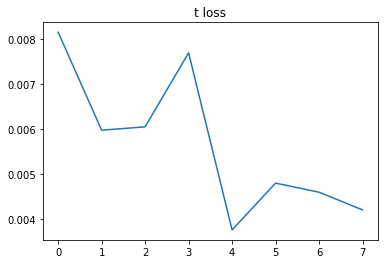

In [17]:
acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.title('training accuracy')

plt.figure()

loss = history.history['loss']
plt.plot(epochs, loss)
plt.title('t loss')

In [18]:
import numpy as np
p=model.predict(x_test)
p = [np.argmax(x) for x in p]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.99      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

